In [4]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [5]:
# Tenta configurar a versão do TensorFlow para 2.x no ambiente do Colab
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [6]:

# Importa bibliotecas necessárias
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:

# Define os hiperparâmetros
vocab_size = 10000            # Tamanho do vocabulário para o tokenizador
embedding_dim = 16            # Dimensão dos embeddings
max_length = 100              # Comprimento máximo das sequências de texto
trunc_type = 'post'           # Tipo de truncamento das sequências (corte no final)
padding_type = 'post'         # Tipo de preenchimento das sequências (preenchimento no final)
oov_tok = "<OOV>"             # Token para palavras fora do vocabulário
training_size = 20000         # Tamanho do conjunto de treinamento

In [ ]:
# Inicializa listas para armazenar sentenças e rótulos
sentences = []
labels = []

# Carrega o arquivo JSON e extrai sentenças e rótulos
with open("dataset/sarcasm.json", 'r') as f:
    for line in f:
        datastore = json.loads(line)
        sentences.append(datastore['headline'])
        labels.append(datastore['is_sarcastic'])


In [ ]:
# Exibe todas as sentenças carregadas
sentences

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [ ]:

# Divide os dados em conjuntos de treinamento e teste
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
# Cria e ajusta o tokenizador no conjunto de treinamento
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

# Obtém o índice das palavras do tokenizador
word_index = tokenizer.word_index

# Converte as sentenças de treinamento e teste em sequências de inteiros
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Converte as sentenças de teste em sequências de inteiros
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
# Converte os dados de treinamento e teste para arrays numpy para compatibilidade com TensorFlow
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
training_padded.dtype

dtype('int32')

In [ ]:
testing_padded.dtype

dtype('int32')

In [ ]:
training_labels.dtype

dtype('int32')

In [ ]:
testing_labels.dtype

dtype('int32')

In [ ]:
# Define o modelo de rede neural sequencial
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),  # Camada de embedding
    tf.keras.layers.GlobalAveragePooling1D(),                                      # Camada de pooling global
    tf.keras.layers.Dense(24, activation='relu'),                                  # Camada densa com 24 neurônios e ReLU
    tf.keras.layers.Dense(1, activation='sigmoid')                                 # Camada de saída com um neurônio e sigmoide
])

In [ ]:
# Compila o modelo com função de perda e otimizador
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6654 - accuracy: 0.5868 - val_loss: 0.5920 - val_accuracy: 0.7951 - 4s/epoch - 6ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4326 - accuracy: 0.8296 - val_loss: 0.3819 - val_accuracy: 0.8404 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3078 - accuracy: 0.8753 - val_loss: 0.3501 - val_accuracy: 0.8548 - 2s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2553 - accuracy: 0.8985 - val_loss: 0.3419 - val_accuracy: 0.8556 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2197 - accuracy: 0.9150 - val_loss: 0.3528 - val_accuracy: 0.8517 - 2s/epoch - 4ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1920 - accuracy: 0.9265 - val_loss: 0.3610 - val_accuracy: 0.8535 - 2s/epoch - 4ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1711 - accuracy: 0.9361 - val_loss: 0.3665 - val_accuracy: 0.8544 - 2s/epoch - 4ms/step
Epoch 8/30
625/625 - 4s - loss: 0.1530 - accuracy: 0.9440 - val_loss: 0.3857 - val_accuracy: 0.8524 - 4s/epoch - 6ms/step
Epoch 9/30
625/625 - 1s 

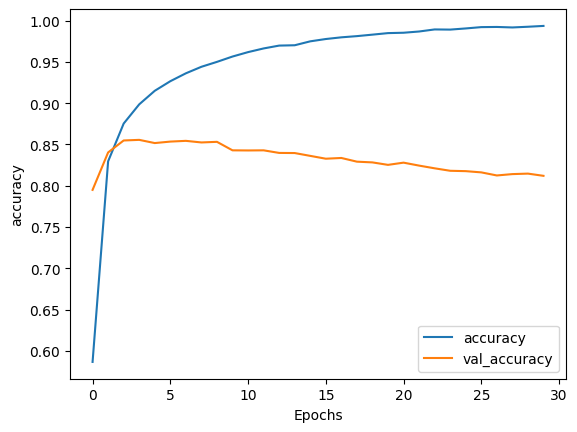

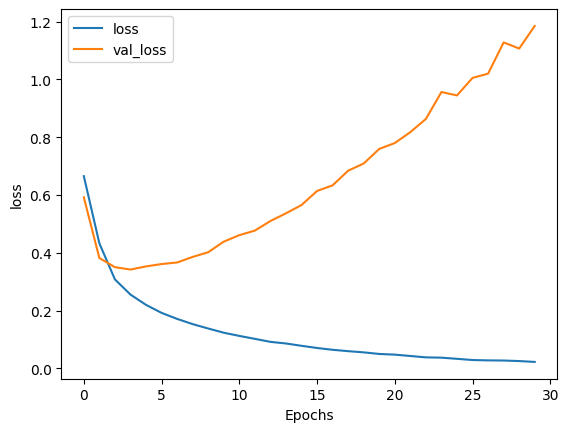

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))